Insert Badge:  
<a href="https://colab.research.google.com/github/JennEYoon/code/blob/main/current/gdrive_chollet_chp2_mathbasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quick Practice, on Code repo, Current folder  
Date: April 15, 2022  
Author: Jennifer E Yoon  


# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

In [ ]:
len(train_labels)

In [ ]:
train_labels

In [ ]:
test_images.shape

In [ ]:
len(test_labels)

In [ ]:
test_labels

**The network architecture**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [3]:
!pwd

/content


**The compilation step**

In [4]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [6]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.2537 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1032 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0675 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0496 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0365 - accuracy: 0.9890


**Using the model to make predictions**

In [7]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([2.8973037e-08, 7.6271968e-11, 1.4394335e-05, 5.3234666e-04,
       6.5674176e-12, 6.6158989e-08, 3.0839423e-14, 9.9944609e-01,
       8.5143540e-07, 6.1814221e-06], dtype=float32)

In [8]:
predictions[0].argmax()

7

In [9]:
predictions[0][7]

0.9994461

In [10]:
test_labels[0]

7

**Evaluating the model on new data**

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0622 - accuracy: 0.9795
test_acc: 0.9794999957084656


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [26]:
import numpy as np

In [27]:
x = np.array(10)
x

array(10)

In [30]:
x.ndim

0

### Vectors (rank-1 tensors)

### Matrices (rank-2 tensors)

In [22]:

x = np.array([[[12, 1, 2], [3, 4, 5], [10, 11, 12]], [[3, 4, 5], [10, 11, 12],[12, 1, 2]]])
x

array([[[12,  1,  2],
        [ 3,  4,  5],
        [10, 11, 12]],

       [[ 3,  4,  5],
        [10, 11, 12],
        [12,  1,  2]]])

In [23]:
x.ndim

3

In [24]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [25]:
x.ndim

1

In [31]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [32]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [33]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [34]:
train_images.ndim

3

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

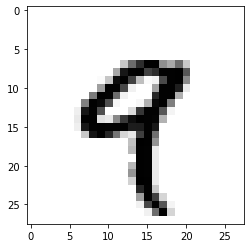

In [37]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [38]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [39]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [48]:
my_slice = train_images[10:11, :, :]
my_slice.shape

(1, 28, 28)

In [49]:
my_slice

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42,
         118, 219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242,
         254, 254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,
           0,   0,   0

In [51]:
my_slice = train_images[10:11, 0:28, 0:28]
my_slice.shape

(1, 28, 28)

In [53]:
my_slice = train_images[10:11, 14:, 14:]
my_slice

array([[[254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [ 89,  93, 240, 254, 171,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   1, 128, 254, 219,  31,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   7, 254, 254, 214,  28,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0, 138, 254, 254, 116,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [ 25, 240, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [206, 254, 254, 139,   8,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [254, 253, 213,  11,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [254, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [239,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   

In [54]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice

array([[[ 49, 238, 253, ...,  93,  82,  82],
        [ 18, 219, 253, ...,   0,   0,   0],
        [  0,  80, 156, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 253, 207,   2],
        [  0,   0,   0, ..., 250, 182,   0],
        [  0,   0,   0, ...,  78,   0,   0]],

       [[  0,   0,   0, ...,  84, 252, 253],
        [  0,   0,   0, ...,  96, 189, 253],
        [  0,   0,   0, ...,  47,  79, 255],
        ...,
        [252, 145,   0, ..., 252, 173,   0],
        [253, 225,   0, ..., 162,   0,   0],
        [252, 249, 146, ...,  56,   0,   0]],

       [[  0,   0,   0, ...,   0,   2, 153],
        [  0,   0,   0, ...,   0,  27, 254],
        [  0,   0,   0, ...,   0, 183, 254],
        ...,
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 255,  94,   0]],

       ...,

       [[  0,   0,   0, ..., 223, 159, 131],
        [  0,   0,   0, ...,  27,   0,   0],
        [  0,   0,  54, ...,   0,   0,   0

### The notion of data batches

In [57]:
batch = train_images[:128]
len(batch)

128

In [58]:
batch = train_images[128:256]

In [61]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
batch
len(batch)

128

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [62]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [63]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [64]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [65]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.31 s


### Broadcasting

In [66]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [67]:
y = np.expand_dims(y, axis=0)

In [68]:
Y = np.concatenate([y] * 32, axis=0)

In [69]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [70]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary

### My Notes:  

bbb
bbb